1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
#author Federico Pilotto 2107076
#imports cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la

Eigenvalues:
 [ 2.65447419e+01+0.j -8.70494030e-16+0.j  1.98249454e+00+0.j] 

Eigenvectors:
 [[-0.11614369 -0.81649658  0.5655475 ]
 [-0.57650771 -0.40824829 -0.7077939 ]
 [-0.8087951   0.40824829  0.42330111]] 

U:
 [[-0.11614369  0.5655475  -0.81649658]
 [-0.57650771 -0.7077939  -0.40824829]
 [-0.8087951   0.42330111  0.40824829]] 

s:
 [2.65447419e+01 1.98249454e+00 1.57834103e-15] 

Vt:
 [[-0.11614369 -0.57650771 -0.8087951 ]
 [ 0.5655475  -0.7077939   0.42330111]
 [ 0.81649658  0.40824829 -0.40824829]] 

Eigenvalues are the same with eig() and svd() methods? False
Variability:  0.9999999999999999


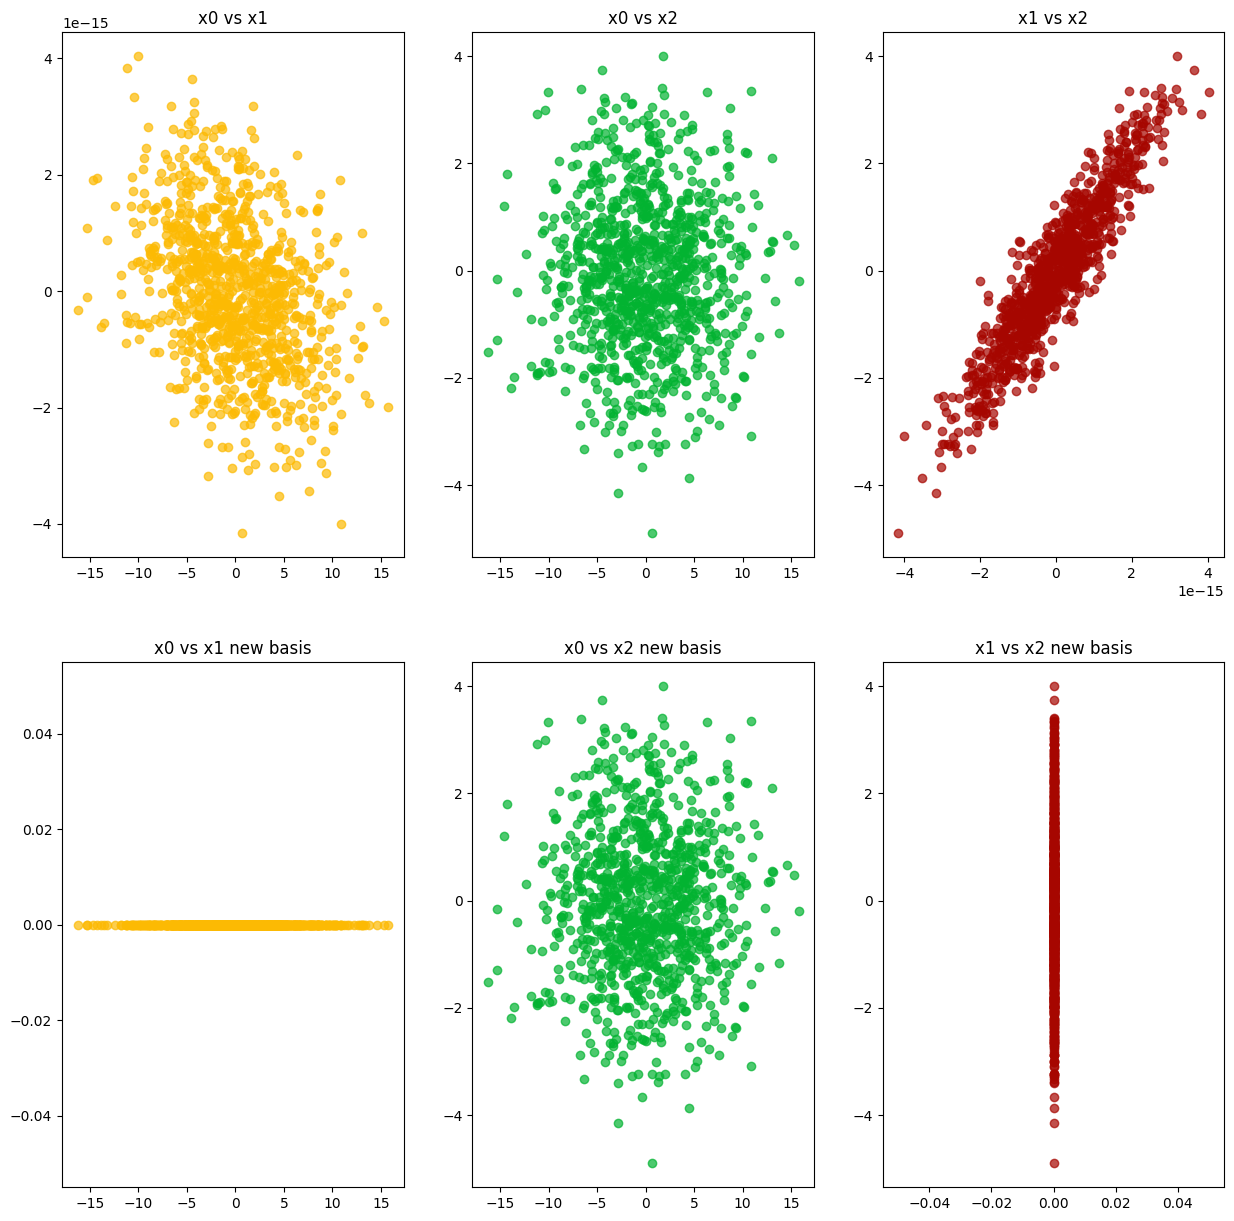

In [2]:
#x1 = N(0,1)
#x2 = x1 + N(0,3)
#x3 = 2x1 + x2
mu1 = 0
mu2 = 0
sigma1 = 1
sigma2 = 3
x1 = np.random.normal(mu1, sigma1, 1000)
x2 = x1 + np.random.normal(mu2, sigma2, 1000)
x3 = 2*x1 + x2

matrix = np.array([x1, x2, x3])
cov = np.cov(matrix)

l, V = la.eig(cov)
print('Eigenvalues:\n', l, '\n')
print('Eigenvectors:\n', V, '\n')

U, s, Vt = la.svd(cov)
print('U:\n', U, '\n')
print('s:\n',s, '\n')
print('Vt:\n',Vt, '\n')

svd_eigenvectors = Vt.T
svd_eigenvalues = s**2
print('Eigenvalues are the same with eig() and svd() methods?', np.allclose(svd_eigenvalues, l))

l = abs(l)
l_sorted = np.sort(l)
variability = abs((l_sorted[2]+l_sorted[1])/l_sorted.sum())
print('Variability: ',variability)

copyV = np.copy(V)
copyV[:3, np.argmin(l)] = 0
out = np.dot(matrix.T, copyV)
X = np.dot(matrix.T, V)

#plot the graphics
fig, axs = plt.subplots(2, 3, figsize=(15,15))

axs[0, 0].scatter(X[:,0], X[:,1], alpha=0.7, color='#fcba03')
axs[0, 0].set_title("x0 vs x1")
axs[0, 1].scatter(X[:,0], X[:,2], alpha=0.7, color='#02b331')
axs[0, 1].set_title("x0 vs x2")
axs[0, 2].scatter(X[:,1], X[:,2], alpha=0.7, color='#a60600')
axs[0, 2].set_title("x1 vs x2")

axs[1, 0].scatter(out[:,0], out[:,1], alpha=0.7, color='#fcba03')
axs[1, 0].set_title("x0 vs x1 new basis")
axs[1, 1].scatter(out[:,0], out[:,2], alpha=0.7, color='#02b331')
axs[1, 1].set_title("x0 vs x2 new basis")
axs[1, 2].scatter(out[:,1], out[:,2], alpha=0.7, color='#a60600')
axs[1, 2].set_title("x1 vs x2 new basis")
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

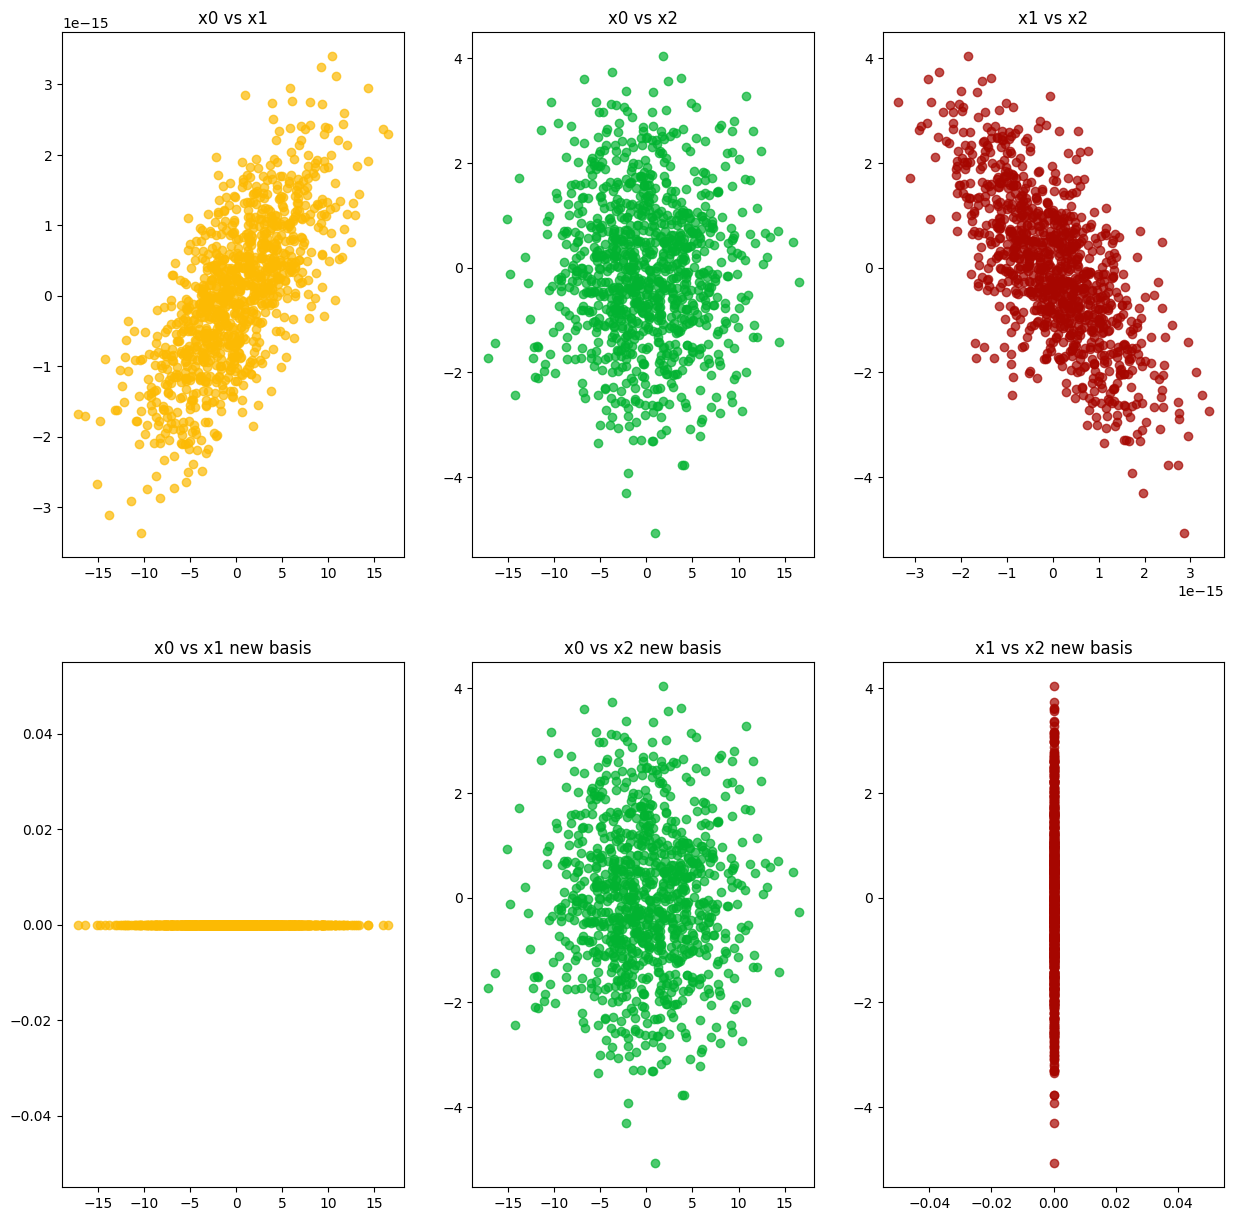

In [3]:
#creating new normal distribution with mean and standard deviation smaller than the previous with factor 20
newsigma1 = sigma1/20
newsigma2 = sigma2/20
n1 = np.random.normal(mu1, newsigma1, (1000, 10))
n2 = np.random.normal(mu2, newsigma2, (1000, 10))

newx1 = n1.sum(axis=1) + x1
newx2 = n2.sum(axis=1) + x2
newx3 = 2 * newx1 + newx2

#same code as in the previous point
matrix = np.array([newx1, newx2, newx3])
cov = np.cov(matrix)
l, V = la.eig(cov)

copyV = np.copy(V)
copyV[:3, np.argmin(l)] = 0
out = np.dot(matrix.T, copyV)
X = np.dot(matrix.T, V)

#plot the graphics
fig, axs = plt.subplots(2, 3, figsize=(15,15))

axs[0, 0].scatter(X[:,0], X[:,1], alpha=0.7, color='#fcba03')
axs[0, 0].set_title("x0 vs x1")
axs[0, 1].scatter(X[:,0], X[:,2], alpha=0.7, color='#02b331')
axs[0, 1].set_title("x0 vs x2")
axs[0, 2].scatter(X[:,1], X[:,2], alpha=0.7, color='#a60600')
axs[0, 2].set_title("x1 vs x2")

axs[1, 0].scatter(out[:,0], out[:,1], alpha=0.7, color='#fcba03')
axs[1, 0].set_title("x0 vs x1 new basis")
axs[1, 1].scatter(out[:,0], out[:,2], alpha=0.7, color='#02b331')
axs[1, 1].set_title("x0 vs x2 new basis")
axs[1, 2].scatter(out[:,1], out[:,2], alpha=0.7, color='#a60600')
axs[1, 2].set_title("x1 vs x2 new basis")
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 